Here, I'll show you all the work together! I will not explain each line of code, but what I want to 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utility import plot_settings
from scripts.used_functions import *
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

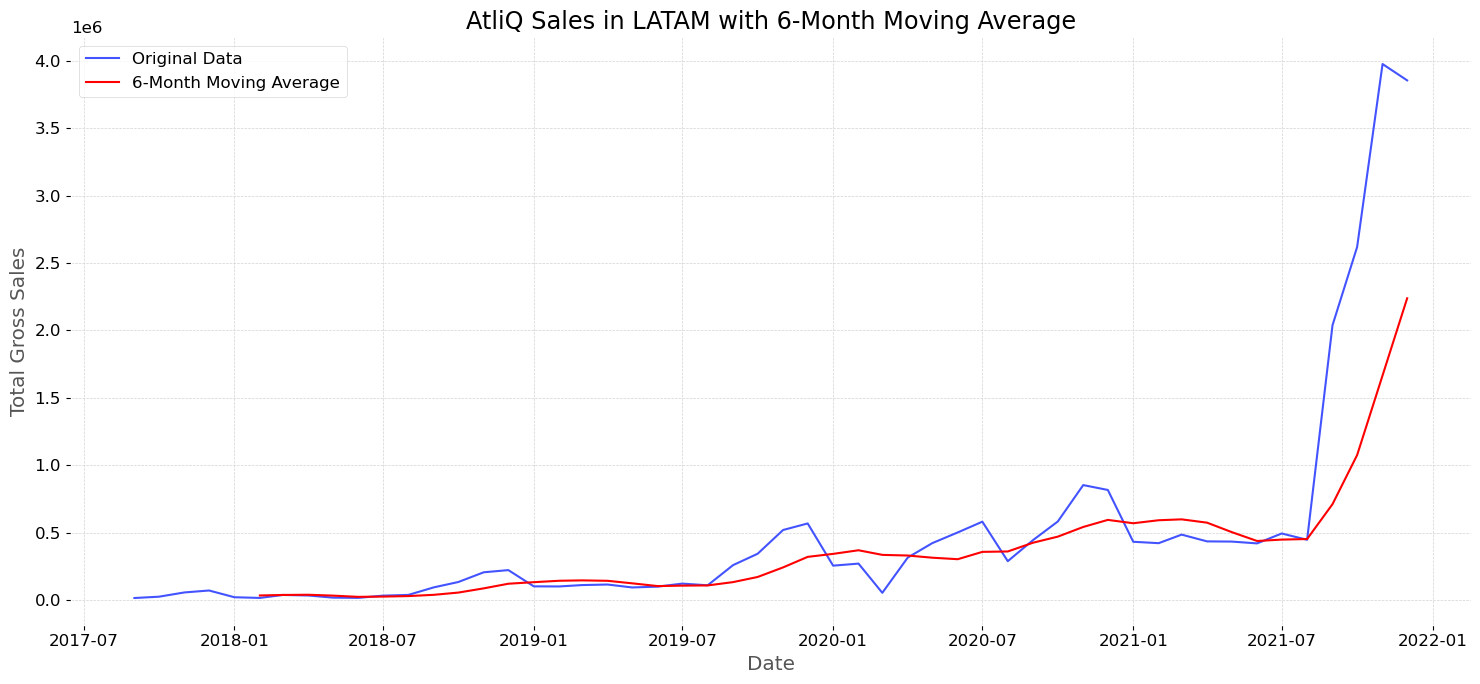

In [6]:
LATAM = pd.read_pickle("../../data/raw/AtliQ_sales_LATAM.pkl")
# Convert the 'date' column to datetime format
LATAM['date'] = pd.to_datetime(LATAM['date'])
plot_sales_with_moving_average(LATAM)

**Observations:**

- There's an apparent exponential growth in total sales. This trend suggests that sales have been increasing at an accelerated pace during the period represented in the data.

- The 6-month moving average shows a clear trend with less noise compared to the original data, making it easier to identify general patterns and trends.

The problem is that we stopped getting historical information from those last 6 months when the growth began to be the pivotal point of the picture.
What factors might have caused these sales?

Well, let's see. We have ample data to visualize the growth of sales in Latin America with every sale of the period!

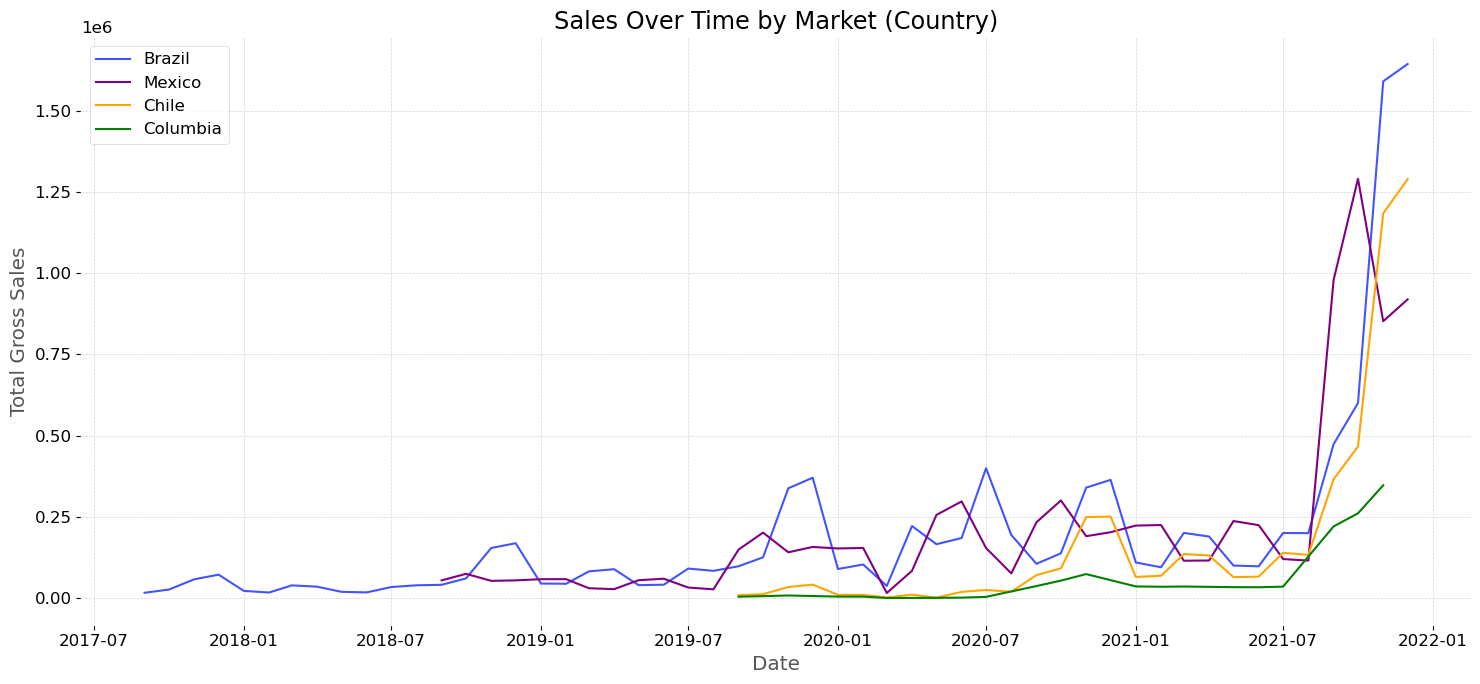

In [7]:
plot_sales_by_market(LATAM)

Great! We can see that Brazil has been in the market the longest, that Mexico had a drastic drop around October-November 2021, and there might have been a significant reason for that. However, what I'm interested in analyzing is Chile, as it's the shortest in duration and has shown the most exponential growth compared to its time length:

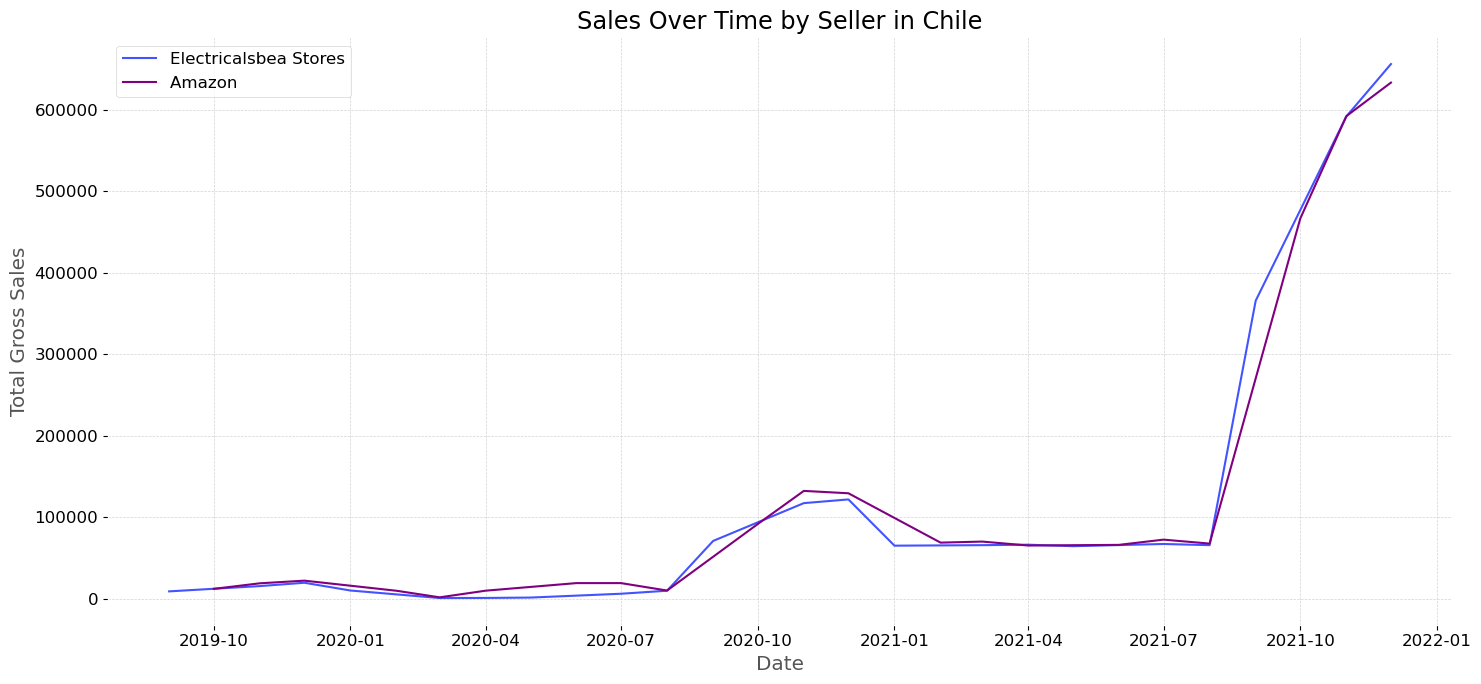

In [8]:
chile = LATAM.query('market == "Chile"')
plot_sales_by_customer(chile)

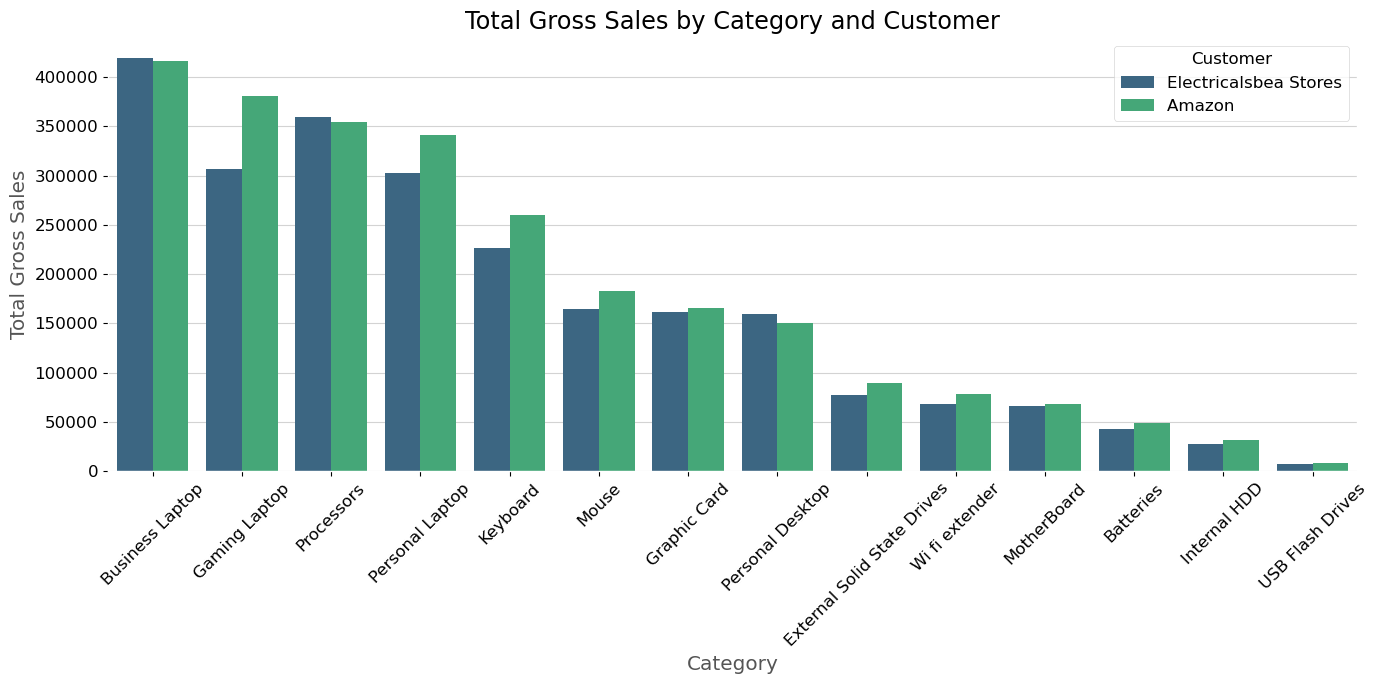

In [9]:
plot_sales_by_category_and_customer(chile)

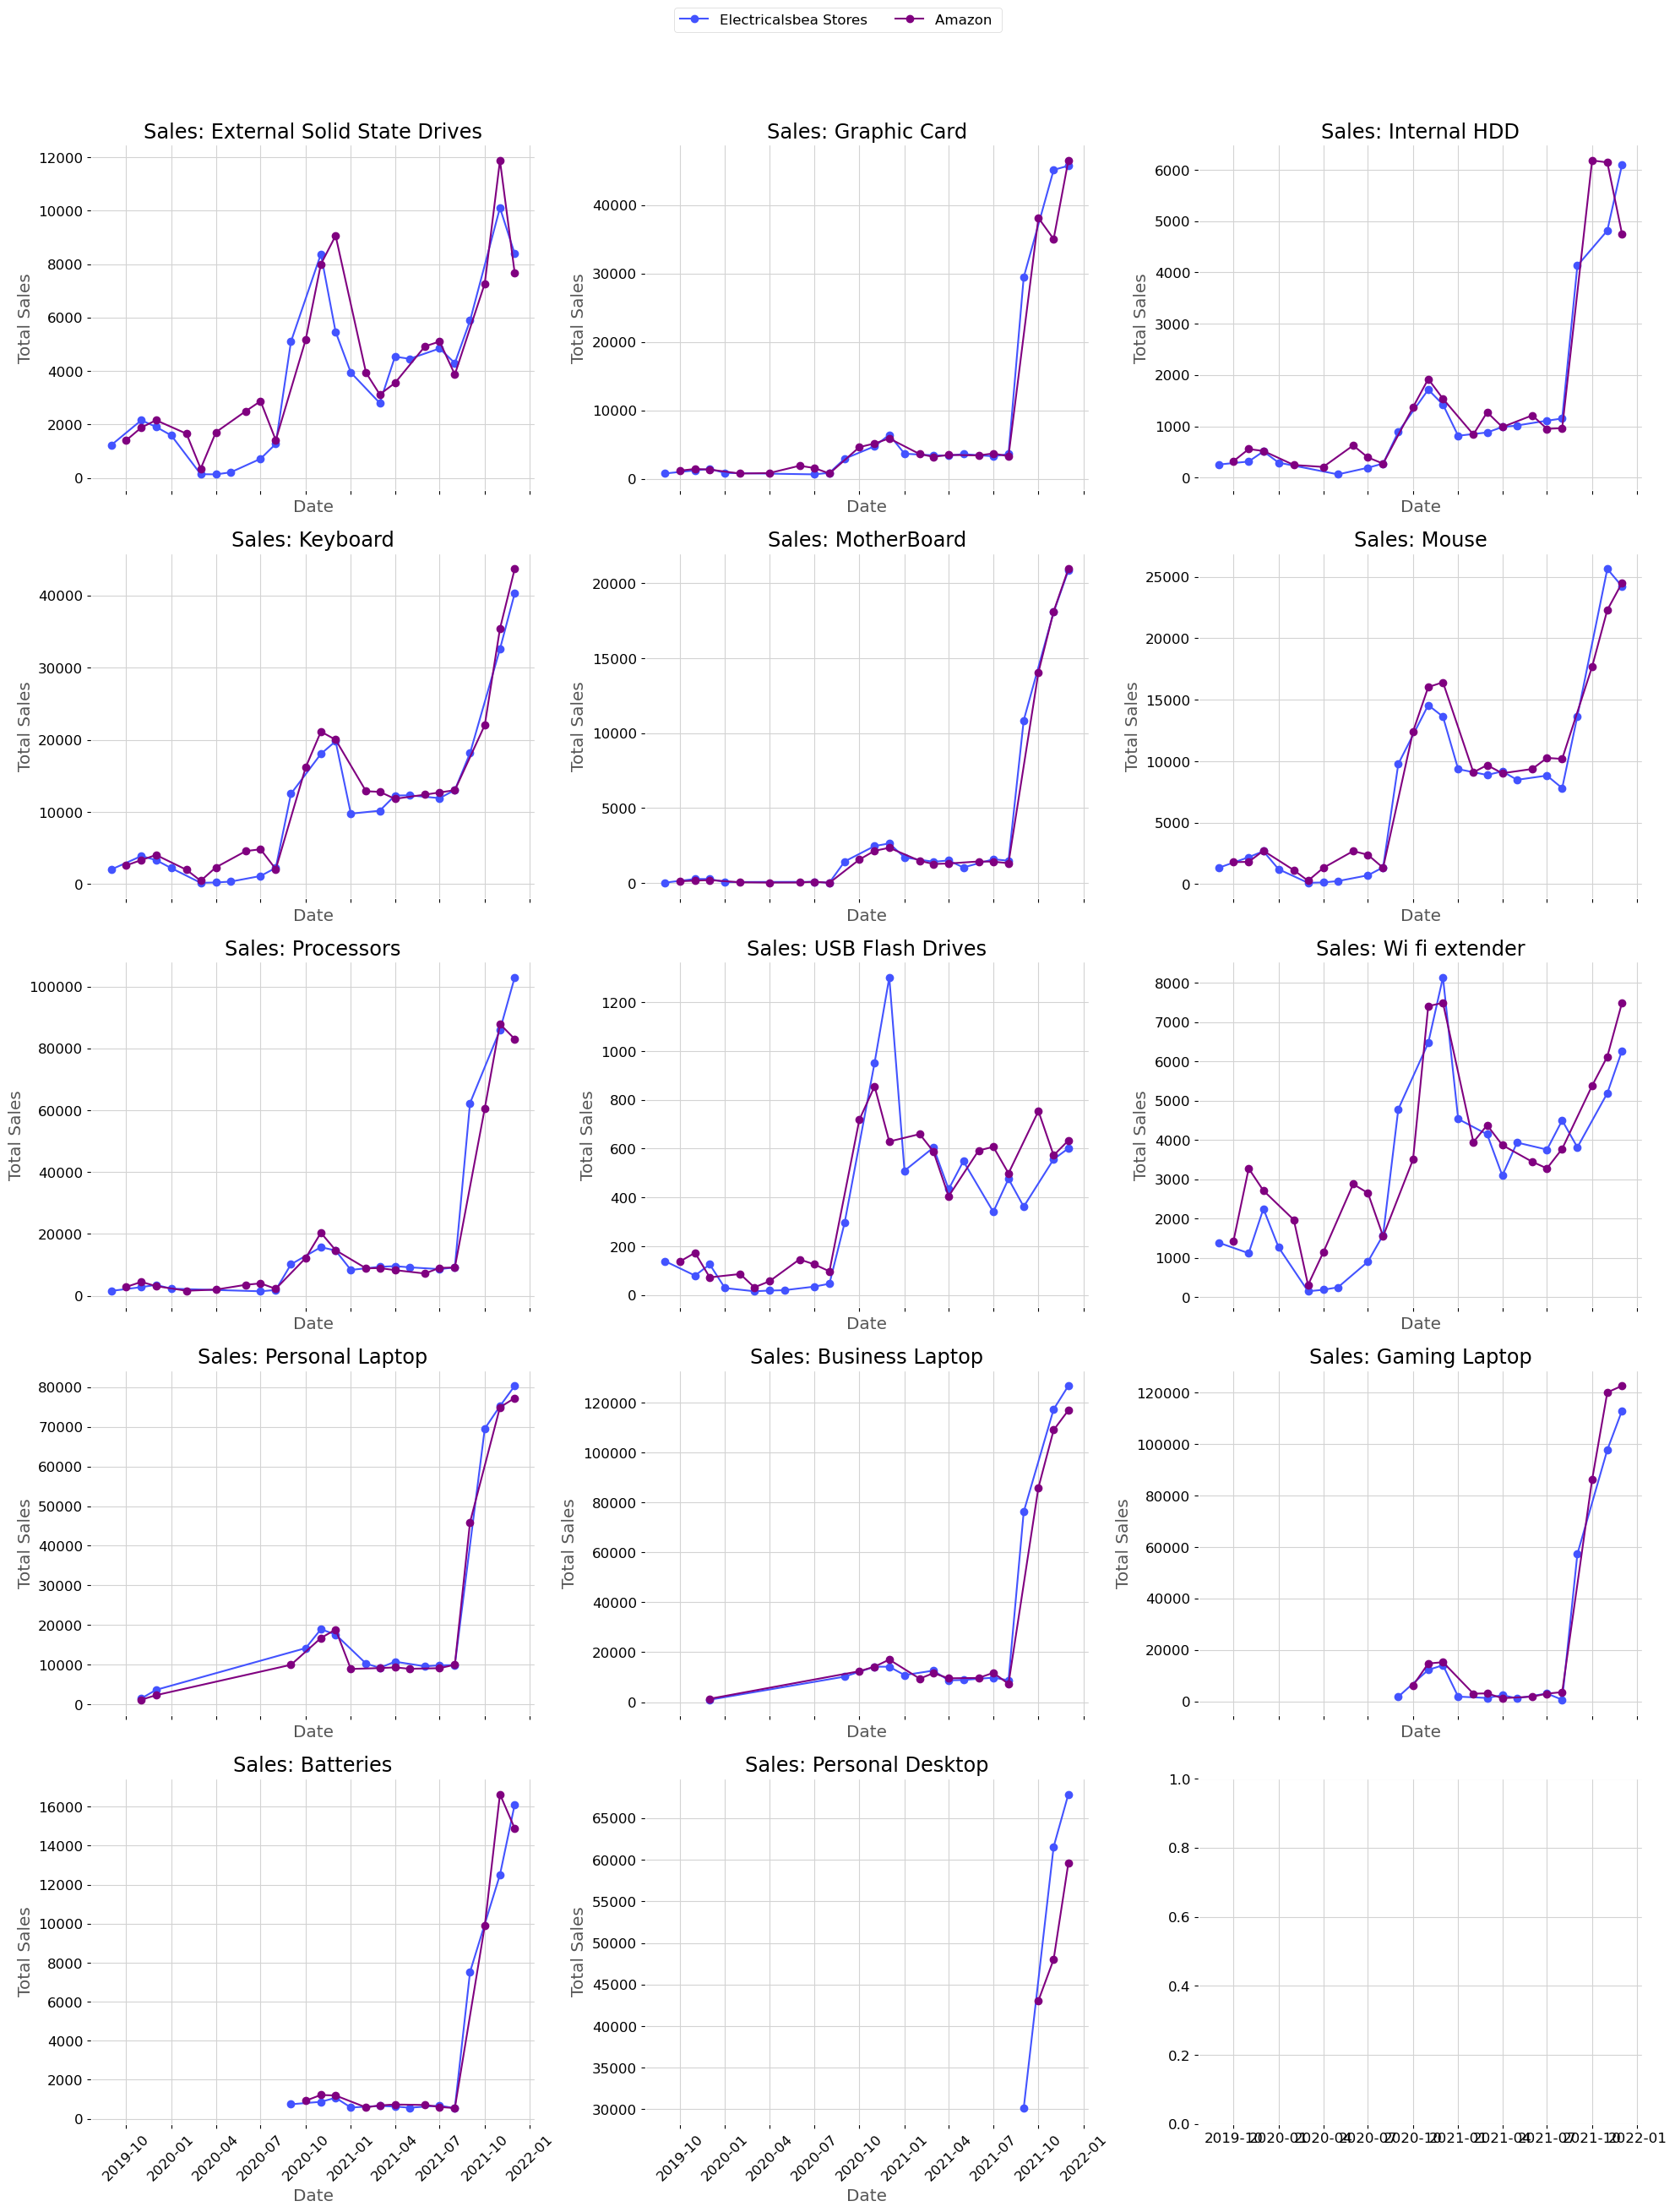

In [10]:
plot_sales_category_matrix(chile)

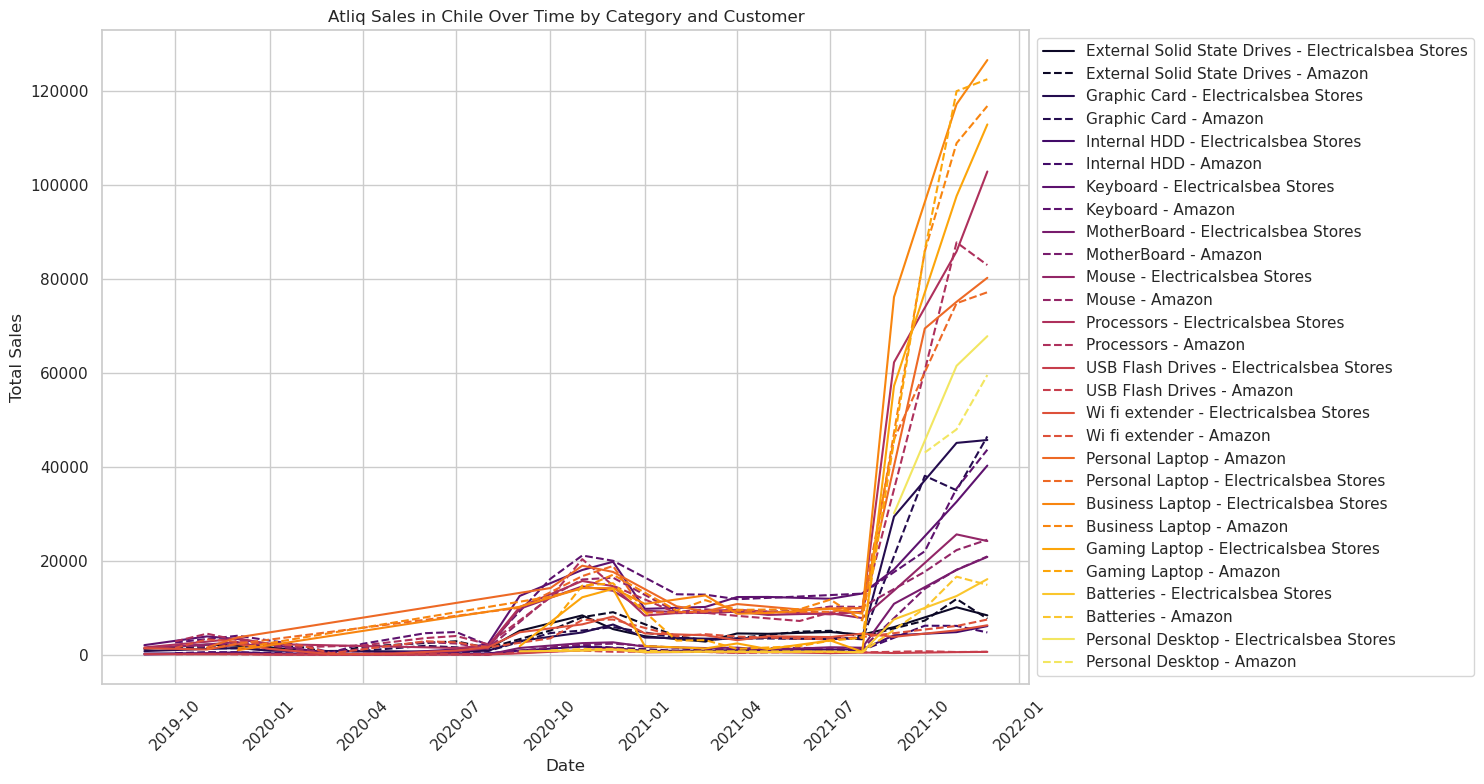

In [11]:
plot_sales_by_category(chile)

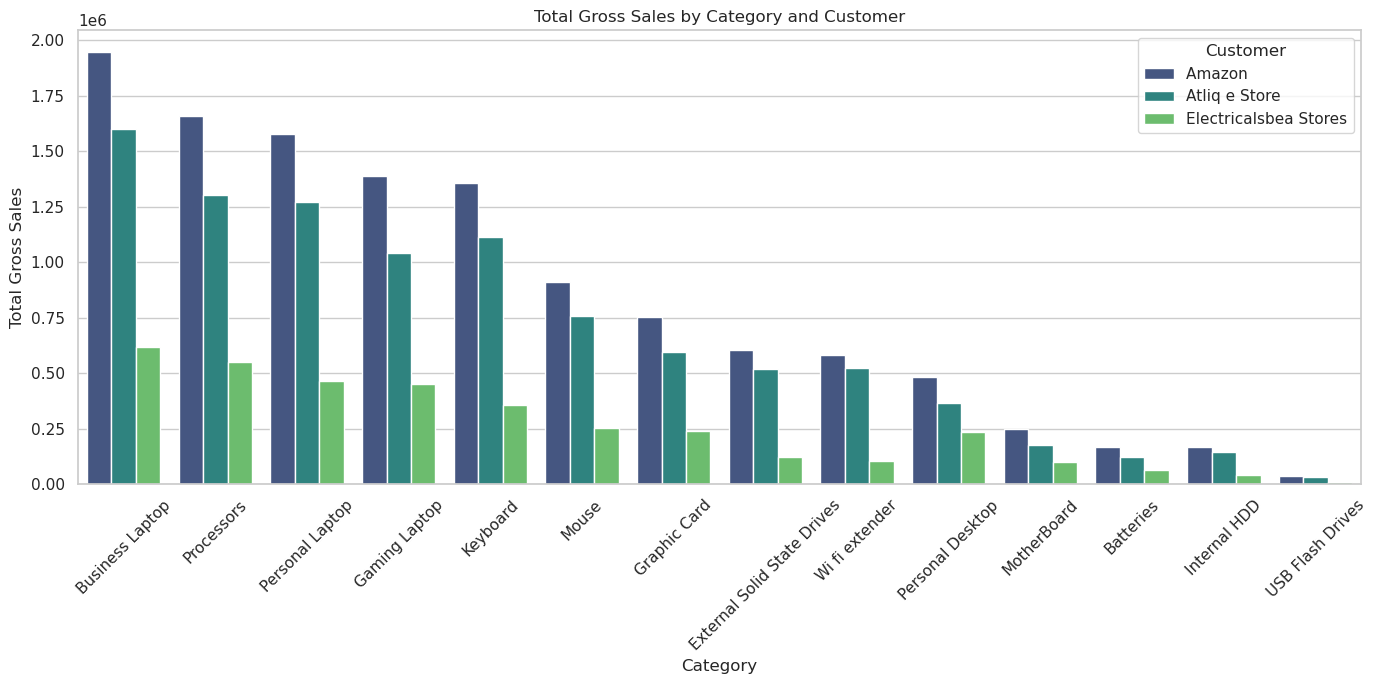

In [12]:
plot_sales_by_category_and_customer(LATAM)

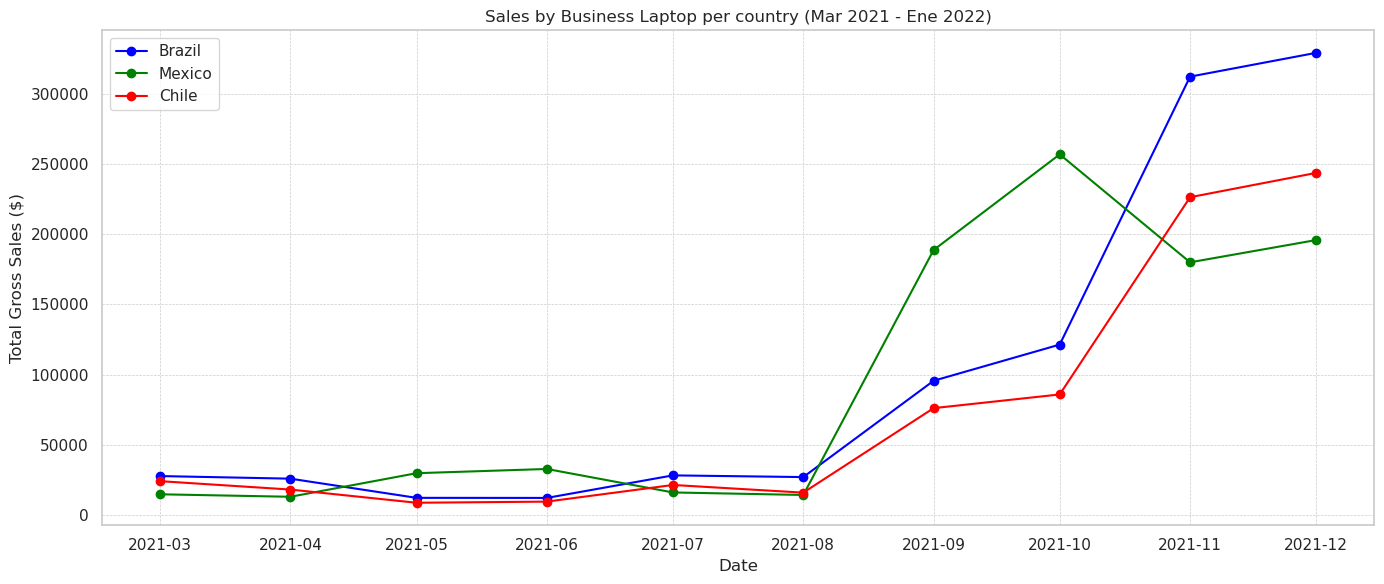

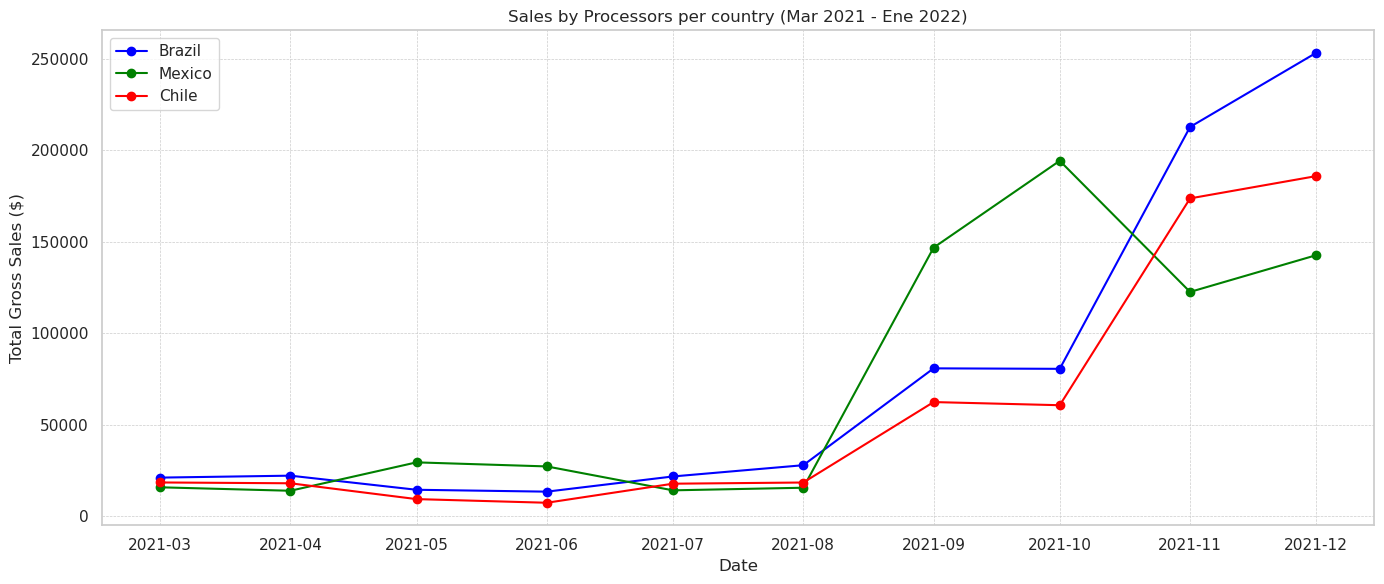

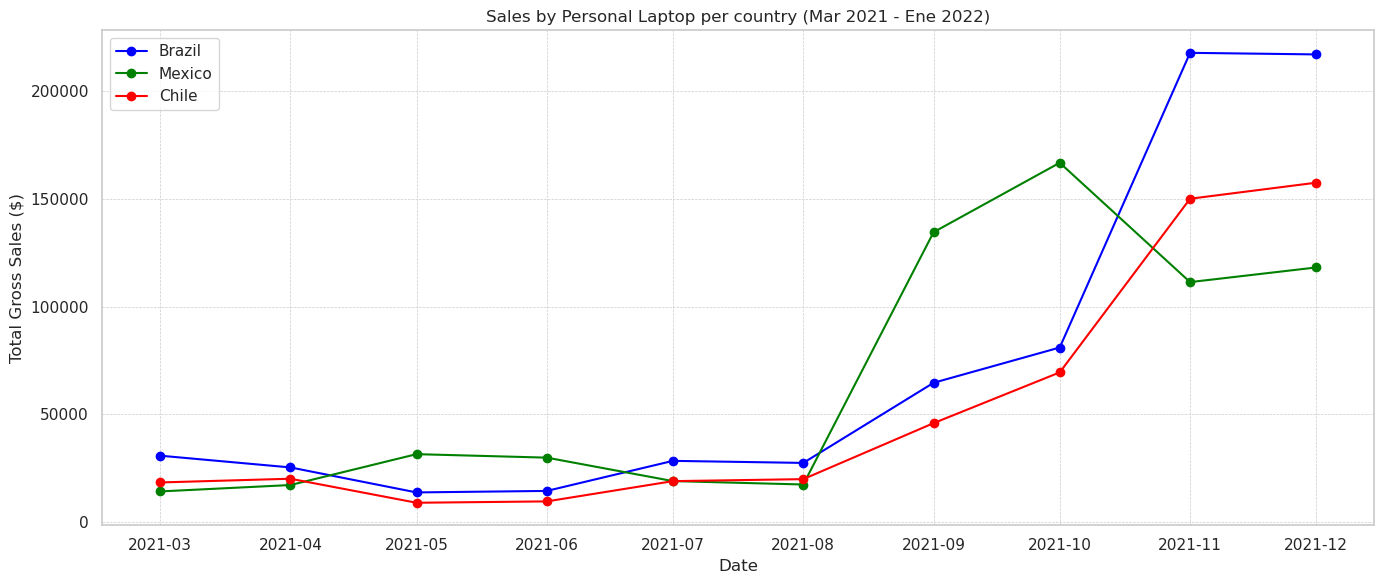

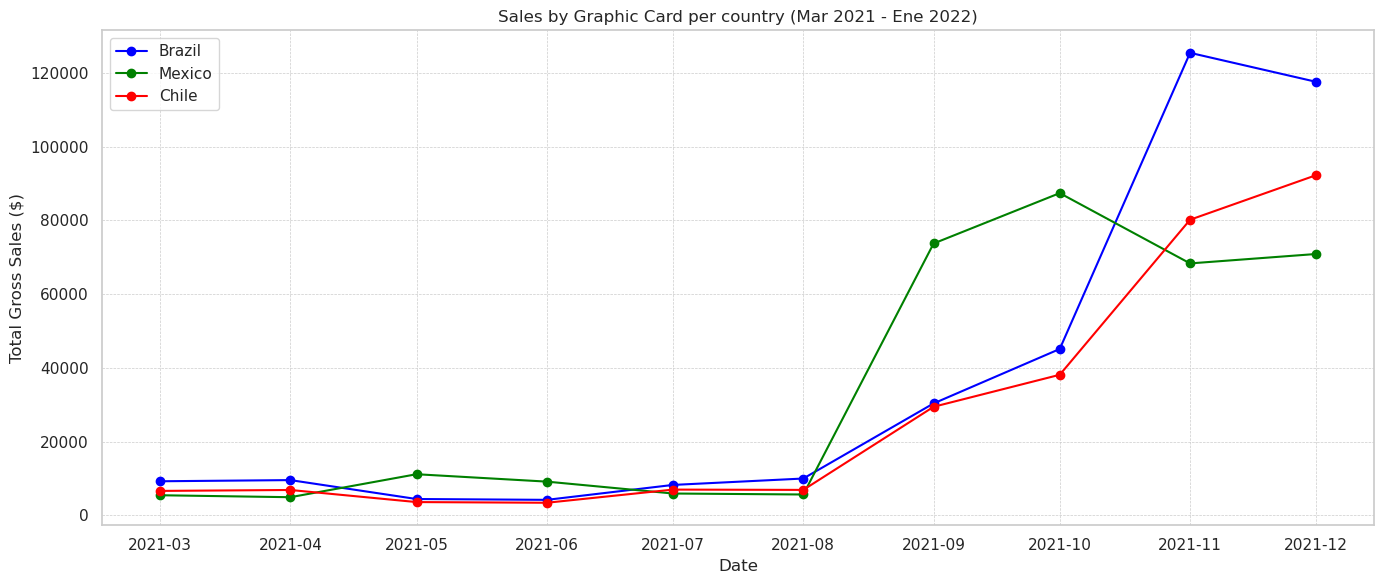

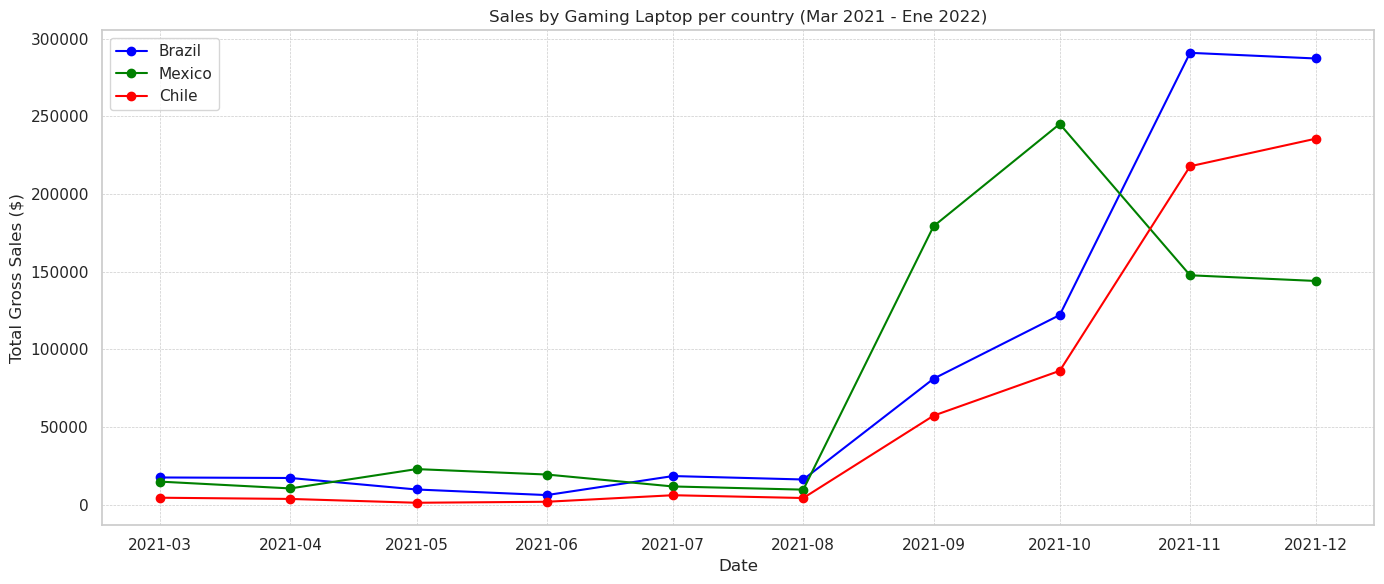

In [13]:
selected_categories = ['Business Laptop', 'Personal Laptop','Gaming Laptop','Processors','Graphic Card']
top_categories = LATAM.loc[LATAM['category'].isin(selected_categories)]

start_date = '2021-03-01'
end_date = '2022-01-31'

# date range filter
filtered_data = top_categories[(top_categories['date'] >= start_date) & (top_categories['date'] <= end_date)].reset_index(drop=True)
filtered_data2 = filtered_data.loc[~(filtered_data['market']=='Columbia')]

plot_sales_by_selected_categories_countries(filtered_data2)


We can see that sales by country tend to be very similar, although they vary a bit depending on the category! This confirms what was already suspected: Hardware sales in Latin America do not depend on a product, a category, a platform, or even a country!
So, what do they depend on? I believe there are many factors, and if I had to specify one, I'd say market needs!

I didn't find specific information about AtliQ Hardware in August 2021, but I found this: [https://esemanal.mx/2021/08/idc-back-to-school-2021-impulsa-el-negocio-de-hardware-y-conectividad/]. This article mentions the back-to-school post-pandemic period! follow the notebook where I talk about all of these.

---
Alright! Based on the information and previous visualizations, I have a hypothesis 😄:

The drastic growth in AtliQ sales in Latin America was due to students' need for a computer for the post-pandemic return to school. Moreover, at that time, I believe there was a shortage of computers, a supply gap that perhaps AtliQ was able to fill and capitalize on sales in the market.

Were AtliQ's sales in Latin America fortunate? Perhaps the post-pandemic situation benefited them, but I think the company knew how to leverage the situation and effectively steer their sales direction.


In [14]:
selected_categories = ['Business Laptop', 'Personal Laptop','Gaming Laptop','Processors','Graphic Card']
top_categories = LATAM.loc[LATAM['category'].isin(selected_categories)]

start_date = '2021-03-01'
end_date = '2022-01-31'
df = top_categories[(top_categories['date'] >= start_date) & (top_categories['date'] <= end_date)].reset_index(drop=True)

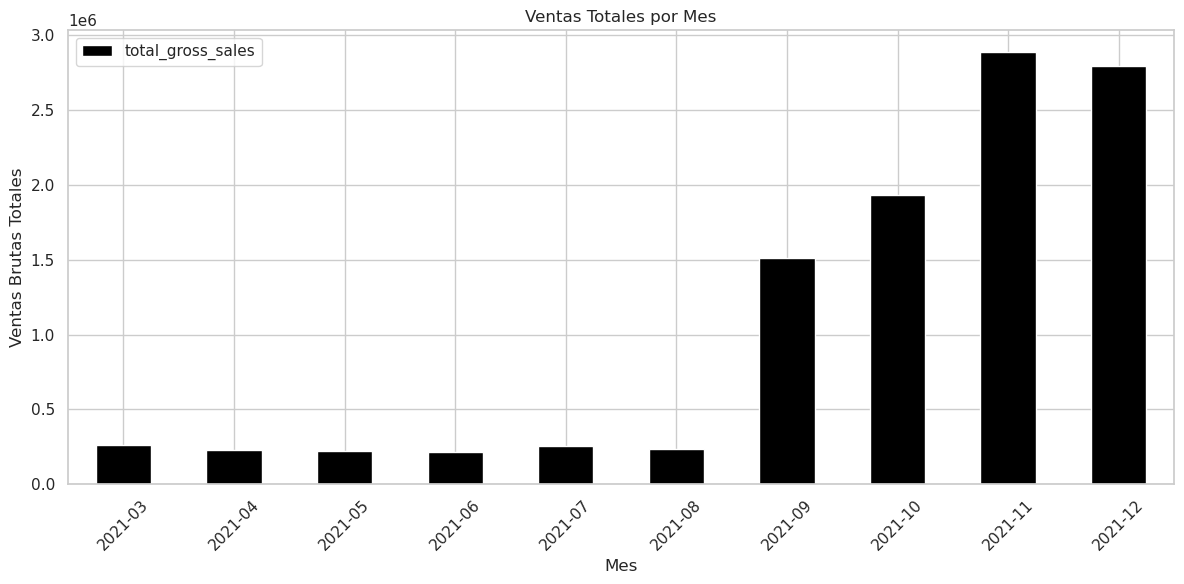

In [15]:
plot_sales_by_month(df)

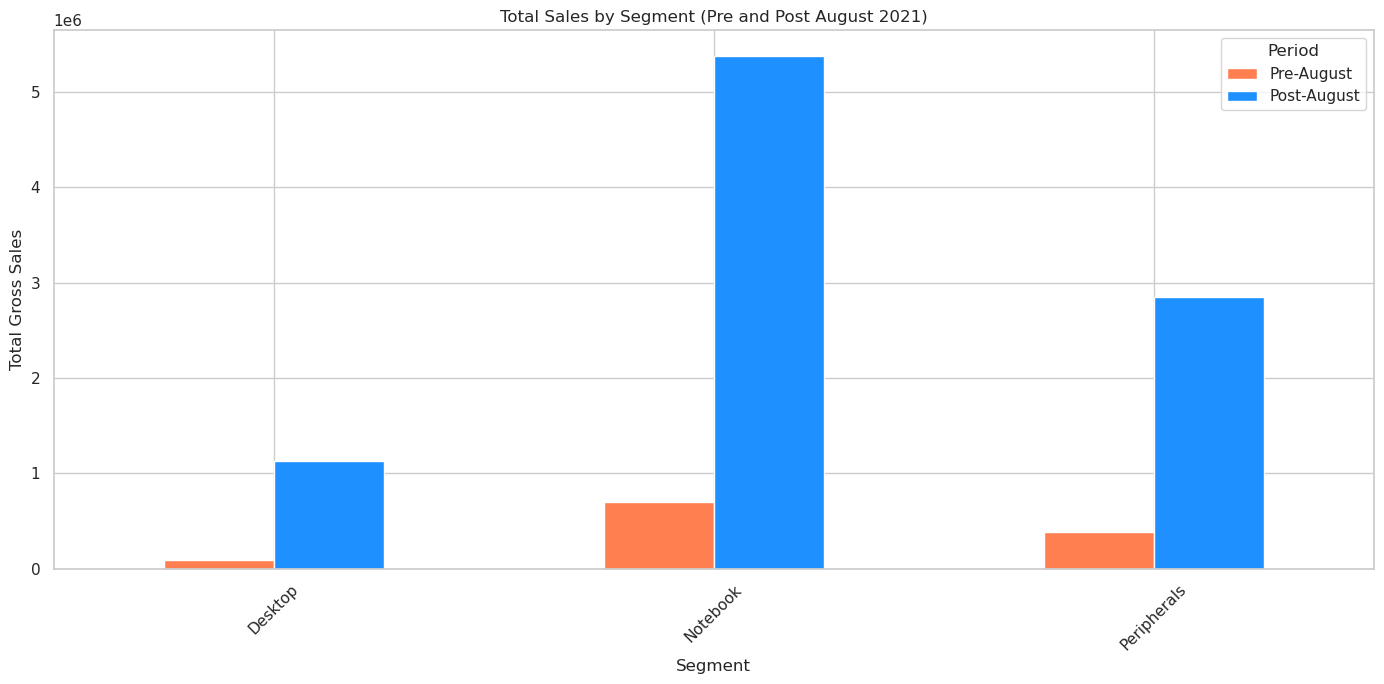

In [16]:
plot_sales_by_segment(df)   


### Conclusion:
The initial hypothesis suggested that the drastic change in AtliQ's sales was due to a high demand for hardware for the return to school in Latin America, and that AtliQ was able to supply and capitalize on this.

Based on the analysis of the data provided:

1. AtliQ's total sales showed a significant increase in August and September of 2021, supporting the idea of a surge in hardware demand during the back-to-school period in LATAM.

2. Hardware-related categories, such as Electronics, Computers, and Software, experienced a sharp increase in sales in the post-August period, indicating a growing demand for tools and devices for online learning and work.

3. E-commerce platforms, particularly Amazon and Atliq e Store, dominated sales during this period. This could indicate a preference for online shopping, possibly due to post-pandemic circumstances and the return to school in an online or hybrid format.